#### Project - Risk Assessment Model

Author - Angel Das

Create Date - 29-May-2020

Last Modified - 29-May-2020


<b> Data Description </b>

In this dataset, you are provided over a hundred variables describing attributes of life insurance applicants. The task is to predict the "Response" variable for each Id in the test set. "Response" is an ordinal measure of risk that has 8 levels.

<b> File descriptions </b>

train.csv - the training set, contains the Response values
test.csv - the test set, you must predict the Response variable for all rows in this file
sample_submission.csv - a sample submission file in the correct format

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns
# import pandas_profiling

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

from yellowbrick.classifier import ClassificationReport, ROCAUC

plt.style.use('ggplot')
pd.options.display.float_format = '{:,.2f}'.format

from IPython.core.display import display, HTML

display(HTML("<style>.container { width:95% !important; }</style>"))

In [3]:
#-----------------------------------Reading the data-----------------------------------------
customer_data=pd.read_csv('Insurance_risk.csv')
customer_data.head(5) #------------------Displaying the first few records of the data

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.08,2,1,1,0.64,0.58,...,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.08,2,3,1,0.06,0.60,...,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.08,2,3,1,0.03,0.75,...,0,0,0,0,0,0,0,0,0,8
3,7,1,D4,10,0.49,2,3,1,0.16,0.67,...,0,0,0,0,0,0,0,0,0,8
4,8,1,D2,26,0.23,2,3,1,0.42,0.65,...,0,0,0,0,0,0,0,0,0,8


In [4]:
print(customer_data.shape)
print(customer_data.size)

(59381, 128)
7600768


<b> Findings </b>

1. Data Set contains 59,381 rows and 128 columns
2. Response is the target variable here; Attribute response has multiple classes hence this is a multiclass classification problem
3. Most of the attributes are scaled or normalized, column ID can be dropped as it is not important for the regression problem

#### Data Treatment

1. Checking for nulls

In [5]:
customer_data.describe()

,Id,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
count,"59,381.00","59,381.00","59,381.00","59,381.00","59,381.00","59,381.00","59,381.00","59,381.00","59,381.00","59,381.00",...,"59,381.00","59,381.00","59,381.00","59,381.00","59,381.00","59,381.00","59,381.00","59,381.00","59,381.00","59,381.00"
mean,"39,507.21",1.03,24.42,0.33,2.01,2.67,1.04,0.41,0.71,0.29,...,0.06,0.01,0.05,0.01,0.01,0.01,0.01,0.02,0.05,5.64
std,"22,815.88",0.16,5.07,0.28,0.08,0.74,0.29,0.20,0.07,0.09,...,0.23,0.10,0.21,0.10,0.09,0.12,0.09,0.14,0.23,2.46
min,2.00,1.00,1.00,0.00,2.00,1.00,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
25%,"19,780.00",1.00,26.00,0.08,2.00,3.00,1.00,0.24,0.65,0.23,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4.00
50%,"39,487.00",1.00,26.00,0.23,2.00,3.00,1.00,0.40,0.71,0.29,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.00
75%,"59,211.00",1.00,26.00,0.49,2.00,3.00,1.00,0.57,0.76,0.35,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,8.00
max,"79,146.00",2.00,38.00,1.00,3.00,3.00,3.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,8.00


In [6]:
customer_data['Response'].isnull().any().any()

False

In [7]:
customer_data.isnull().any().any()

True

In [8]:
#----------------------------------------Data Contains null values. However the scale of most of the values are small---------------------
#---------------------------------------Since Response is a target variable, we first filter out for instance where target is missing---------
#---------------------------------------Since scale of independent variables are small, we replace nulls with 0s------------------------------
print('Replacing missing values')    
customer_data.fillna(0, inplace=True)

Replacing missing values


In [9]:
customer_data.isnull().any().any()

False

In [10]:
print(customer_data.shape)
print(customer_data.size)

(59381, 128)
7600768


2. Dropping unwanted columns

In [11]:
customer_data.drop(['Id'],inplace=True,axis=1)

3. Bivariate Analysis of all dependent Variable

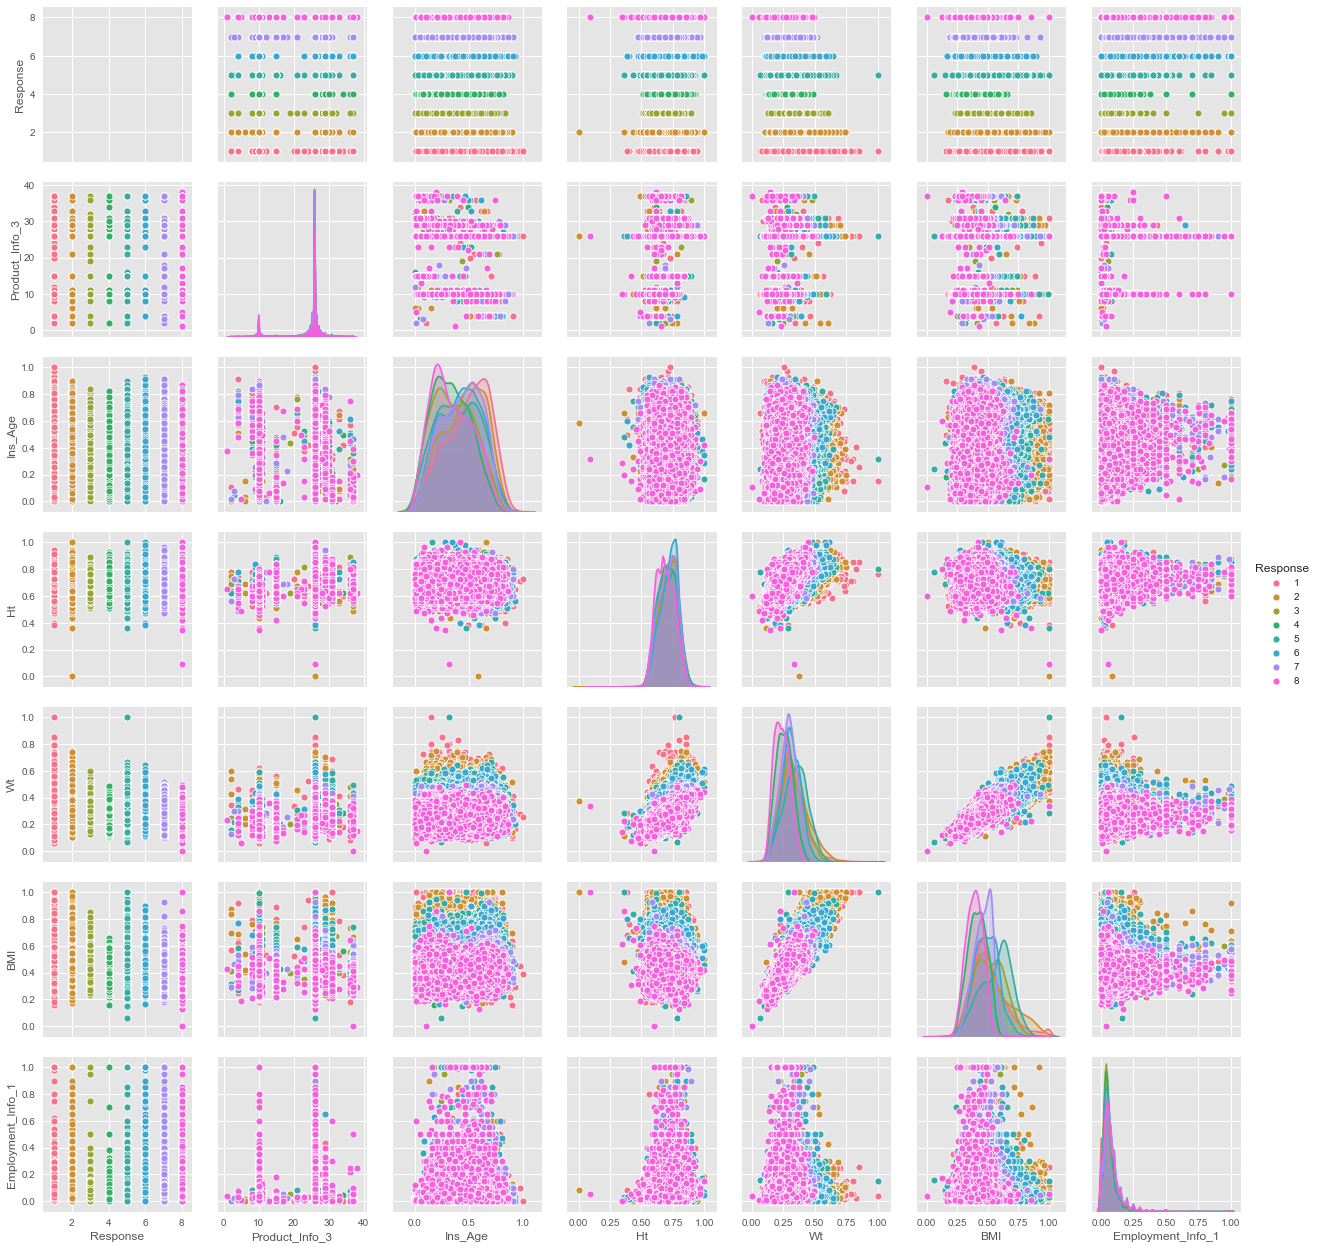

In [12]:
sns.pairplot(customer_data[['Response','Product_Info_3','Ins_Age','Ht','Wt','BMI','Employment_Info_1']],hue='Response');

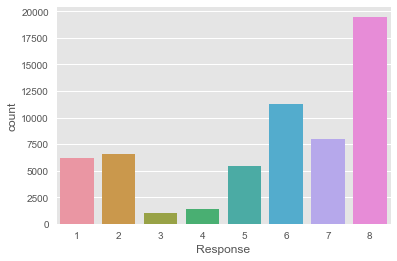

In [13]:
sns.countplot(customer_data['Response'])

#### Test Train Split

In [14]:
customer_data.info()
col_names=list(customer_data.columns[customer_data.dtypes=='object'])
display(col_names)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Columns: 127 entries, Product_Info_1 to Response
dtypes: float64(18), int64(108), object(1)
memory usage: 57.5+ MB


['Product_Info_2']

In [15]:
# Separating independent and dependent variables
X = customer_data.drop(["Response","Product_Info_2"] , axis=1)
y = customer_data["Response"]

In [16]:
from sklearn.model_selection import train_test_split

test_size = 0.30 # taking 70:30 training and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=35)

In [17]:
algo= []
tr = []
te = []
recall = []
precision = []
roc_data = []

# Blanks list to store model name, training score, testing score, recall, precision and roc

#### Decision Tree - With deafult Values

In [18]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [19]:
#training acuracy
dt_model.score(X_train, y_train)

0.9999518837511427

In [20]:
#testing acuracy
dt_model.score(X_test, y_test)

0.42997474038731404

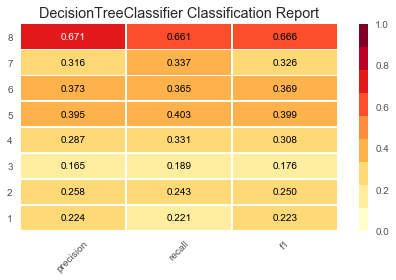

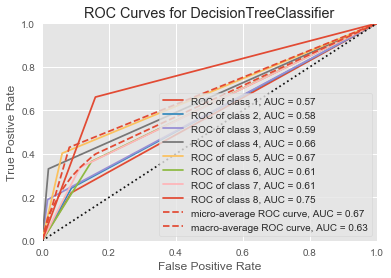

In [21]:
#------------------ROC - AOC Score------------------------
# Visualize model performance with yellowbrick library
viz = ClassificationReport(DecisionTreeClassifier(random_state=42))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(DecisionTreeClassifier(random_state=42))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

In [22]:
treeObj = dt_model.tree_
print ('Total Nodes:',treeObj.node_count)
print('Depth:',dt_model.get_depth())
print('Total Leaves:',dt_model.get_n_leaves())

Total Nodes: 27055
Depth: 52
Total Leaves: 13528


In [23]:
feature_cols = X_train.columns

feat_importance = dt_model.tree_.compute_feature_importances(normalize=False)


feat_imp_dict = dict(zip(feature_cols, dt_model.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False)[0:10] #Top 10 features

,0
BMI,0.14
Ins_Age,0.05
Product_Info_4,0.05
Employment_Info_1,0.04
Wt,0.04
Medical_History_15,0.04
Medical_History_2,0.04
Medical_History_4,0.03
Medical_History_1,0.03
Employment_Info_6,0.03


In [24]:
model_dt = DecisionTreeClassifier(random_state = 42)

model_dt.fit(X_train, y_train)

algo.append('Decision Tree - Default')

tr.append(model_dt.score(X_train, y_train))
te.append(model_dt.score(X_test, y_test))

recall.append(recall_score(y_test,model_dt.predict(X_test),average="macro"))
precision.append(precision_score(y_test,model_dt.predict(X_test),average="macro"))

roc_data.append(0.63)

In [25]:
# Decision Tree Classifier using entropy, adding the values in the list

model = DecisionTreeClassifier(criterion = "entropy", random_state = 42, max_depth=4, min_samples_leaf=5)

model.fit(X_train, y_train)

algo.append('Decision Tree entropy')
tr.append(model.score(X_train, y_train))
te.append(model.score(X_test, y_test))
recall.append(recall_score(y_test,model.predict(X_test),average="macro"))
precision.append(precision_score(y_test,model.predict(X_test),average="macro"))

In [26]:
# Decision Tree Classifier using entropy, adding the values in the list

model = DecisionTreeClassifier(criterion = "gini", random_state = 42, max_depth=4, min_samples_leaf=5)

model.fit(X_train, y_train)

algo.append('Decision Tree gini')
tr.append(model.score(X_train, y_train))
te.append(model.score(X_test, y_test))
recall.append(recall_score(y_test,model.predict(X_test),average="macro"))
precision.append(precision_score(y_test,model.predict(X_test),average="macro"))

In [27]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42, n_estimators=50)

model.fit(X_train, y_train)

algo.append('Random Forest')
tr.append(model.score(X_train, y_train))
te.append(model.score(X_test, y_test))
recall.append(recall_score(y_test,model.predict(X_test),average="macro"))
precision.append(precision_score(y_test,model.predict(X_test),average="macro"))

In [28]:
# Bagging
from sklearn.ensemble import BaggingClassifier

model = BaggingClassifier(random_state=7,n_estimators=100, max_samples= .7, bootstrap=True, oob_score=True)

model.fit(X_train, y_train)

algo.append('Bagging')
tr.append(model.score(X_train, y_train))
te.append(model.score(X_test, y_test))
recall.append(recall_score(y_test,model.predict(X_test),average="macro"))
precision.append(precision_score(y_test,model.predict(X_test),average="macro"))

In [29]:
from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier(random_state=7,n_estimators= 200, learning_rate=0.1)

model.fit(X_train, y_train)

algo.append('AdaBoost')
tr.append(model.score(X_train, y_train))
te.append(model.score(X_test, y_test))
recall.append(recall_score(y_test,model.predict(X_test),average="macro"))
precision.append(precision_score(y_test,model.predict(X_test),average="macro"))


In [30]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(random_state=7, n_estimators=500,)

model.fit(X_train, y_train)

algo.append('Gradient Boosting')

tr.append(model.score(X_train, y_train))
te.append(model.score(X_test, y_test))
recall.append(recall_score(y_test,model.predict(X_test),average="macro"))
precision.append(precision_score(y_test,model.predict(X_test),average="macro"))


In [31]:
# DataFrame to compare results.

results = pd.DataFrame()
results['Model'] = algo
results['Training Score'] = tr
results['Testing Score'] = te
results['Recall'] = recall
results['Precision'] = precision

results

,Model,Training Score,Testing Score,Recall,Precision
0,Decision Tree - Default,1.00,0.43,0.34,0.34
1,Decision Tree entropy,0.51,0.50,0.29,0.29
2,Decision Tree gini,0.49,0.49,0.29,0.28
3,Random Forest,1.00,0.55,0.38,0.50
4,Bagging,0.99,0.56,0.42,0.51
5,AdaBoost,0.50,0.50,0.29,0.44
6,Gradient Boosting,0.66,0.57,0.45,0.50


In [32]:
# Bagging
from sklearn.ensemble import BaggingClassifier

model = BaggingClassifier(random_state=7,n_estimators=100, max_samples= .7, bootstrap=True, oob_score=True)

model.fit(X_train, y_train)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=0.7, n_estimators=100,
                  n_jobs=None, oob_score=True, random_state=7, verbose=0,
                  warm_start=False)

In [33]:
## Grid Search CV on Bagging

from sklearn.model_selection import GridSearchCV
params = {'max_samples':[0.7,0.8],'bootstrap':[True],'n_estimators':list(range(10,120,30))} #------------------Setting parameter values for Decision Tree

grid_search_model = GridSearchCV(BaggingClassifier(random_state=42), params, verbose=1, cv=3) #---Cross validation is 3

grid_search_model.fit(X_train, y_train) #---------using model on training and test data


Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed: 17.1min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=BaggingClassifier(base_estimator=None, bootstrap=True,
                                         bootstrap_features=False,
                                         max_features=1.0, max_samples=1.0,
                                         n_estimators=10, n_jobs=None,
                                         oob_score=False, random_state=42,
                                         verbose=0, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'bootstrap': [True], 'max_samples': [0.7, 0.8],
                         'n_estimators': [10, 40, 70, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [34]:
grid_search_model.best_estimator_

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=0.8, n_estimators=100,
                  n_jobs=None, oob_score=False, random_state=42, verbose=0,
                  warm_start=False)

In [35]:
# Bagging
from sklearn.ensemble import BaggingClassifier

model = BaggingClassifier(random_state=7,n_estimators=100, max_samples= .8, bootstrap=True, oob_score=True)

model.fit(X_train, y_train)

algo.append('Bagging - Post GridSearchCV')
tr.append(model.score(X_train, y_train))
te.append(model.score(X_test, y_test))
recall.append(recall_score(y_test,model.predict(X_test),average="macro"))
precision.append(precision_score(y_test,model.predict(X_test),average="macro"))

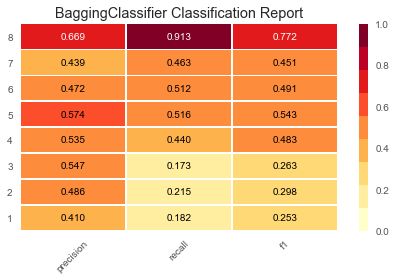

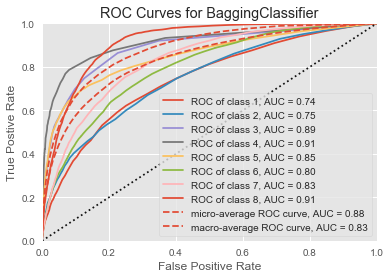

In [36]:
#------------------ROC - AOC Score------------------------
# Visualize model performance with yellowbrick library
viz = ClassificationReport(BaggingClassifier(random_state=7,n_estimators=100, max_samples= .8, bootstrap=True, oob_score=True))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(BaggingClassifier(random_state=7,n_estimators=100, max_samples= .8, bootstrap=True, oob_score=True))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

In [37]:
# DataFrame to compare results.

results = pd.DataFrame()
results['Model'] = algo
results['Training Score'] = tr
results['Testing Score'] = te
results['Recall'] = recall
results['Precision'] = precision

results

,Model,Training Score,Testing Score,Recall,Precision
0,Decision Tree - Default,1.00,0.43,0.34,0.34
1,Decision Tree entropy,0.51,0.50,0.29,0.29
2,Decision Tree gini,0.49,0.49,0.29,0.28
3,Random Forest,1.00,0.55,0.38,0.50
4,Bagging,0.99,0.56,0.42,0.51
5,AdaBoost,0.50,0.50,0.29,0.44
6,Gradient Boosting,0.66,0.57,0.45,0.50
7,Bagging - Post GridSearchCV,1.00,0.56,0.43,0.52
